## <center> Visualization with matplotlib 2</center>
### By the end of this session, you will be able to
#### - prepare basic plots using matplotlib (line, scatter, bar, histogram, heatmap)
#### - identify and fix common errors that occur while plotting
#### - design effective plots to deliver your intended message

### <center> Where were we... </center>
#### Question: How many documents contain 0-100, 100-200, 200-300, ... words?
##### - generated data to answer the question
##### - designed a test to check our algorithm and debugged it
##### - prepared a simple line plot to visualize the results
##### - improved the style of the plot with labels, font size, etc.


# <center> Where we go from here during this lecture... </center>
### - show the data as a scatter and bar plot
### - do all of what we did quicker with less lines (plt.hist)
### - improve your figure designs by using the Gestalt principles of perception 


In [1]:
import numpy as np
np.random.seed(0)

# simulated word counts
nr_words = np.random.lognormal(6, 1, 1000).astype(int)

print('The shortest document has ', np.min(nr_words), ' words.')
print('The longest document has ', np.max(nr_words), ' words.')

The shortest document has  19  words.
The longest document has  6370  words.


In [9]:
bin_edges = np.arange(0,10000,100)

nr_docs_in_bins = np.zeros(len(bin_edges)-1)

for i in range(len(nr_docs_in_bins)):
    nr_docs_in_bins[i] = sum((nr_words >= bin_edges[i]) & \
                             (nr_words < bin_edges[i+1]))
    # let's print the results
    #print('There are',nr_docs_in_bins[i],'documents that contain',bin_edges[i],'to',bin_edges[i+1],'words.')

# sanity check: were all the documents counted?
if len(nr_words) != sum(nr_docs_in_bins):
    print('not all documents were counted!')
    print('there are',len(nr_words),'docs in the dataset.')
    print(sum(nr_docs_in_bins),'docs were counted.')
    raise ValueError

# <center> Scatter plot using plt.scatter </center>

In [10]:
import matplotlib.pyplot as plt
import matplotlib

help(plt.scatter)

Help on function scatter in module matplotlib.pyplot:

scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, *, plotnonfinite=False, data=None, **kwargs)
    A scatter plot of *y* vs *x* with varying marker size and/or color.
    
    Parameters
    ----------
    x, y : array_like, shape (n, )
        The data positions.
    
    s : scalar or array_like, shape (n, ), optional
        The marker size in points**2.
        Default is ``rcParams['lines.markersize'] ** 2``.
    
    c : color, sequence, or sequence of color, optional
        The marker color. Possible values:
    
        - A single color format string.
        - A sequence of color specifications of length n.
        - A sequence of n numbers to be mapped to colors using *cmap* and
          *norm*.
        - A 2-D array in which the rows are RGB or RGBA.
    
        Note that *c* should not be a single numeric RGB or RGBA sequen

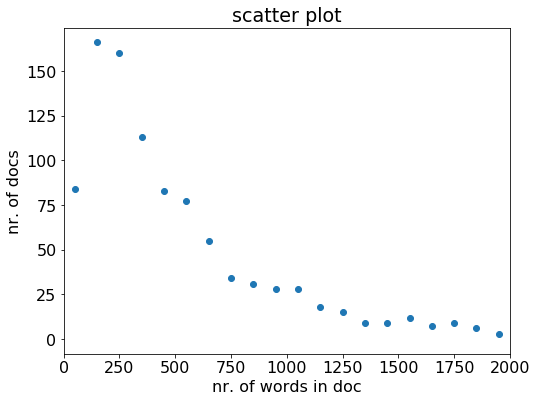

In [11]:
matplotlib.rcParams.update({'font.size': 16})

plt.figure(figsize=(8,6))
bin_center = (bin_edges[1:] + bin_edges[:-1])/2e0
plt.scatter(bin_center,nr_docs_in_bins)
plt.xlim([0,2000])
plt.xlabel('nr. of words in doc')
plt.ylabel('nr. of docs')
plt.title('scatter plot')
plt.show()

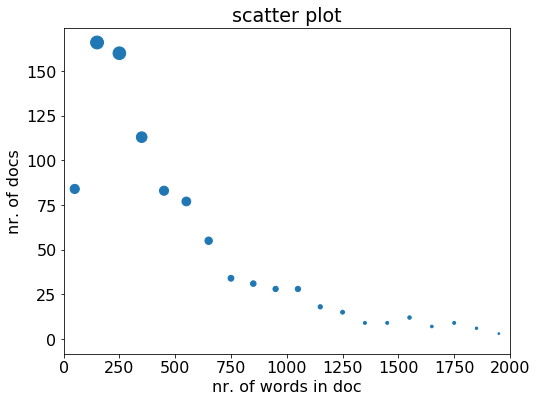

In [12]:

matplotlib.rcParams.update({'font.size': 16})

plt.figure(figsize=(8,6))
bin_center = (bin_edges[1:] + bin_edges[:-1])/2e0
plt.scatter(bin_center,nr_docs_in_bins,s = nr_docs_in_bins)
plt.xlim([0,2000])
plt.xlabel('nr. of words in doc')
plt.ylabel('nr. of docs')
plt.title('scatter plot')
plt.show()

# <center> Bar plot using plt.bar </center>

In [13]:
help(plt.bar)

Help on function bar in module matplotlib.pyplot:

bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)
    Make a bar plot.
    
    The bars are positioned at *x* with the given *align*\ment. Their
    dimensions are given by *width* and *height*. The vertical baseline
    is *bottom* (default 0).
    
    Each of *x*, *height*, *width*, and *bottom* may either be a scalar
    applying to all bars, or it may be a sequence of length N providing a
    separate value for each bar.
    
    Parameters
    ----------
    x : sequence of scalars
        The x coordinates of the bars. See also *align* for the
        alignment of the bars to the coordinates.
    
    height : scalar or sequence of scalars
        The height(s) of the bars.
    
    width : scalar or array-like, optional
        The width(s) of the bars (default: 0.8).
    
    bottom : scalar or array-like, optional
        The y coordinate(s) of the bars bases (default: 0).
    
    align : {'cent

# <center> Exercise 1</center>
## How to visualize the results with plt.bar?
## Write the syntax based on the help.

In [1]:
# add the code here



### <center> plt.hist</center>
#### We can generate the bar plot without counting nr_docs_in_bins
___
```python
bin_edges = np.arange(0,10000,100)

nr_docs_in_bins = np.zeros(len(bin_edges)-1)

for i in range(len(nr_docs_in_bins)):
    nr_docs_in_bins[i] = sum((nr_words >= bin_edges[i]) & \
                             (nr_words < bin_edges[i+1]))
```
___
#### Why did we go through all the trouble with the code and the plt.bar plot?

## Remember the suggestion? 
### *Only use a function if you understand it well enough to write it yourself given enough time.*
## You understand plt.hist well enough to use it.

In [9]:
help(plt.hist)

Help on function hist in module matplotlib.pyplot:

hist(x, bins=None, range=None, density=None, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, normed=None, hold=None, data=None, **kwargs)
    Plot a histogram.
    
    Compute and draw the histogram of *x*. The return value is a
    tuple (*n*, *bins*, *patches*) or ([*n0*, *n1*, ...], *bins*,
    [*patches0*, *patches1*,...]) if the input contains multiple
    data.
    
    Multiple data can be provided via *x* as a list of datasets
    of potentially different length ([*x0*, *x1*, ...]), or as
    a 2-D ndarray in which each column is a dataset.  Note that
    the ndarray form is transposed relative to the list form.
    
    Masked arrays are not supported at present.
    
    Parameters
    ----------
    x : (n,) array or sequence of (n,) arrays
        Input values, this takes either a single array or a sequence of


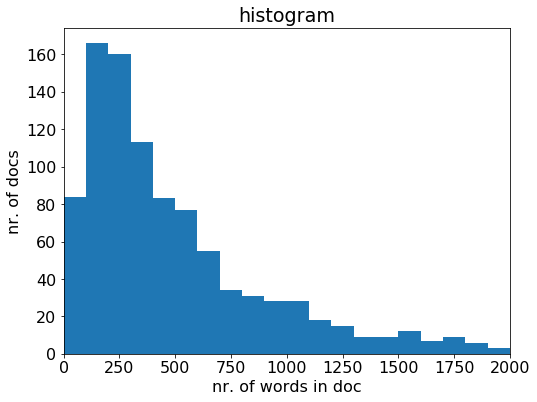

In [15]:
bin_edges = np.arange(0,10000,100)

plt.figure(figsize=(8,6))
plt.hist(nr_words,bin_edges) # nr_docs_in_bins is calculated by plt.hist
plt.xlim([0,2000])
plt.xlabel('nr. of words in doc')
plt.ylabel('nr. of docs')
plt.title('histogram')
plt.show()

# <center> Gestalt principles of perception </center>

https://courses.lumenlearning.com/wsu-sandbox/chapter/gestalt-principles-of-perception/

### <center> When you prepare a figure for an audience...</center>
#### Know what message you want to convey with the figure
##### E.g., I want the audience to notice a trend, or I want the audience to take a closer look at one of the lines, or an outlier point
#### Use the Gestalt principles of perception to your adventage
##### Highlight what you want the audience to see
##### Use colors, line width, marker size to show your intended message

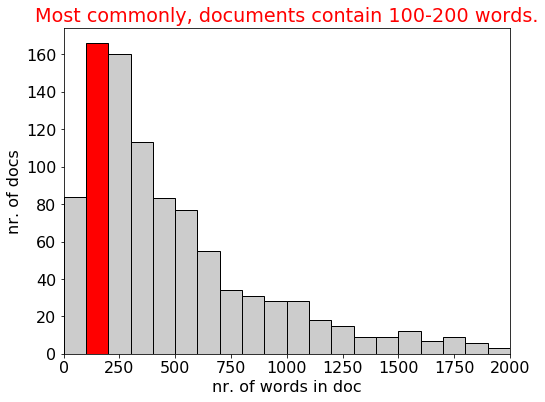

In [16]:

plt.figure(figsize=(8,6))
N, bins, patches = plt.hist(nr_words,bin_edges,color='0.8',edgecolor='k') # nr_docs_in_bins is calculated by plt.hist
patches[1].set_facecolor('r')
plt.xlim([0,2000])
plt.xlabel('nr. of words in doc')
plt.ylabel('nr. of docs')
plt.title('Most commonly, documents contain 100-200 words.',color='r')
plt.show()